In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

same_root = "~/dev/RxCovea/COVID-19_Simulation/Results/61days/Aggregates/" # the core root part of each path

novax = same_root + "NoVax/" # path to no vaccination

standard_path = same_root + "StandardVax/"# path to the standard vaccination

agevax_path = same_root + "AgeVax/"# path to the age vaccination path

movement_path = same_root + "MovementVax/"# path to the movement vaccination strategy

spreading_path = same_root + "SpreadingVax/"# path to the spreading radius strategy

In [7]:
def compareCI(t1: tuple, t2: tuple):
    lower = None # the confidence interval whose lower bound is lower
    upper = None # other confidence interval
    
    if min(t1[0], t2[0]) == t1[0]: # decide which tuple is the lower CI and which is the upper
        print("First inputted confidence interval is CI 1, second confidence interval is CI 2")
        lower = t1
        upper = t2
    else:
        print("Second inputted confidence interval is CI 1, first confidence interval is CI 2")
        lower = t2
        upper = t1
    if lower[1] < upper[0]: # if the upper bound of the lower confidence interval is less than lower bound of second, then it is significant
        print("The mean of CI 1 is significantly less than CI 2")
        return True
    else:
        print("No significant difference in the mean")
        return False
     
 

In [8]:
def getCSV(var : str):
    # var is the compartment that should be analyzed
    nv = pd.read_csv(novax+var+str(".csv")) # novax csv as dataframe
    sv = pd.read_csv(standard_path+var+str(".csv")) # standardvax csv as dataframe
    av = pd.read_csv(agevax_path+var+str(".csv")) # agevax csv as dataframe
    mv = pd.read_csv(movement_path+var+str(".csv")) # movementvax csv as dataframe
    spv = pd.read_csv(spreading_path+var+str(".csv")) # spreadingvax csv as dataframe
    return nv, sv, av, mv, spv
 

In [77]:
df1, df2, df3, df4, df5 = getCSV("ICU")

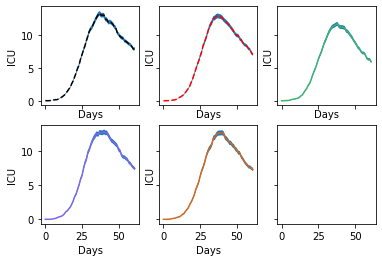

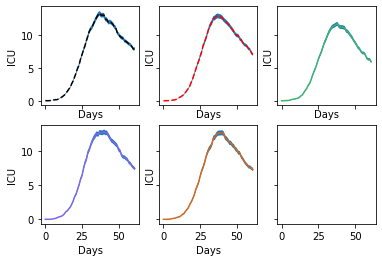

In [80]:
fig2, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, sharex='col', sharey='row')

def plotFigs(df: pd.DataFrame, pltObj, color:str, label):
    pltObj.plot(df['Days'], df['mean'], color)
    pltObj.fill_between(df['Days'], df['LowerBound'], df['UpperBound'])
    pltObj.set_xlabel("Days")
    pltObj.set_ylabel("ICU")
colors = ['k--', 'r--', 'mediumseagreen', 'mediumslateblue', 'chocolate']
axes = [ax1, ax2, ax3, ax4, ax5]
for i, df in enumerate([df1, df2, df3, df4, df5]):
    plotFigs(df, axes[i], colors[i], "ICU")

fig2

In [81]:
df1

,Unnamed: 0,Days,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,...,Run 996,Run 997,Run 998,Run 999,Run 1000,mean,StandardDev,MarginOfError,LowerBound,UpperBound
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.013158,0.114139,0.005937,0.007220,0.019095
4,4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.026316,0.160337,0.008341,0.017975,0.034656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,57.0,8.0,12.0,14.0,5.0,0.0,11.0,12.0,7.0,...,0.0,6.0,16.0,7.0,9.0,8.648026,5.015928,0.260926,8.387100,8.908952
58,58,58.0,14.0,8.0,15.0,6.0,0.0,13.0,11.0,5.0,...,0.0,6.0,14.0,7.0,9.0,8.523026,4.911709,0.255504,8.267522,8.778531
59,59,59.0,10.0,9.0,10.0,7.0,0.0,6.0,12.0,6.0,...,0.0,10.0,13.0,6.0,8.0,8.243421,4.630929,0.240898,8.002523,8.484320
60,60,60.0,9.0,13.0,6.0,4.0,0.0,14.0,12.0,5.0,...,0.0,7.0,8.0,8.0,10.0,7.868421,4.682929,0.243603,7.624818,8.112025
